# All imports necessary

In [2]:
import os
import pandas as pd
import numpy as np

In [27]:
import seaborn as sns

In [28]:
import matplotlib.pyplot as plt

# Download the data from Kaggle

Kaggle competition link is [here](https://www.kaggle.com/c/kkbox-music-recommendation-challenge).

In [3]:
!pip -V

pip 10.0.1 from C:\Users\Efim_Golovin\Desktop\COURSES\ML\11. RECOMMENDATION SYSTEMS_2\RECOMMENDATION_SYSTEMS_2\venv\lib\site-packages\pip-10.0.1-py3.6.egg\pip (python 3.6)



In [3]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2616           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge       9819           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4103           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         26           False  
pubg-finish-placement-prediction               2019-01-30 23:59:00  Playground            Swag        499           False  
human-protein-atlas-image-classification       2019-01-10 23:59:00  Featured           $37,000        287           False  
two-sigm

In [4]:
!kaggle competitions download -c kkbox-music-recommendation-challenge -p ../data/datasets/

  0%|                                                | 0.00/453k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 453k/453k [00:00<00:00, 5.77MB/s]
 78%|█████████████████████████████▌        | 1.00M/1.29M [00:00<00:00, 5.19MB/s]
100%|██████████████████████████████████████| 1.29M/1.29M [00:00<00:00, 5.30MB/s]
100%|██████████████████████████████████████| 41.9M/41.9M [00:07<00:00, 5.77MB/s]

100%|████████████████████████████████████████| 101M/101M [00:18<00:00, 5.88MB/s]

100%|███████████████████████████████████████▊| 101M/101M [00:19<00:00, 4.10MB/s]
100%|████████████████████████████████████████| 101M/101M [00:19<00:00, 5.40MB/s]
100%|██████████████████████████████████████| 98.8M/98.8M [00:19<00:00, 4.87MB/s]



In [6]:
!ls -alth ../data/datasets/

итого 345M
-rw-rw-r--. 1 bender bender  99M окт 17 03:02 song_extra_info.csv.7z
drwxrwxr-x. 2 bender bender 4,0K окт 17 03:02 .
-rw-rw-r--. 1 bender bender 102M окт 17 03:02 train.csv.7z
-rw-rw-r--. 1 bender bender 101M окт 17 03:01 songs.csv.7z
-rw-rw-r--. 1 bender bender  42M окт 17 03:01 test.csv.7z
-rw-rw-r--. 1 bender bender 1,3M окт 17 03:01 members.csv.7z
-rw-rw-r--. 1 bender bender 453K окт 17 03:01 sample_submission.csv.7z
drwxrwxr-x. 3 bender bender 4,0K окт 17 01:39 ..


# Read the data

## Song extra info

In [8]:
data_directory = '../data/datasets/'

In [9]:
song_extra_info = pd.read_csv(os.path.join(data_directory, 'song_extra_info.csv'))

In [10]:
song_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [11]:
song_extra_info.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
song_id    2295971 non-null object
name       2295969 non-null object
isrc       2159423 non-null object
dtypes: object(3)
memory usage: 52.6+ MB


## Train

In [12]:
train = pd.read_csv(os.path.join(data_directory, 'train.csv'))

In [13]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [14]:
train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  7377418 non-null object
song_id               7377418 non-null object
source_system_tab     7352569 non-null object
source_screen_name    6962614 non-null object
source_type           7355879 non-null object
target                7377418 non-null int64
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [42]:
train['data_from'] = 'train'

## Test

In [15]:
test = pd.read_csv(os.path.join(data_directory, 'test.csv'))

In [16]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [17]:
test.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
id                    2556790 non-null int64
msno                  2556790 non-null object
song_id               2556790 non-null object
source_system_tab     2548348 non-null object
source_screen_name    2393907 non-null object
source_type           2549493 non-null object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB


In [35]:
test['target'] = None

In [37]:
test['data_from'] = 'test'

## Songs

In [33]:
songs = pd.read_csv(os.path.join(data_directory, 'songs.csv'))

In [19]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [20]:
songs.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
song_id        2296320 non-null object
song_length    2296320 non-null int64
genre_ids      2202204 non-null object
artist_name    2296320 non-null object
composer       1224966 non-null object
lyricist       351052 non-null object
language       2296319 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


## Members

In [21]:
members = pd.read_csv(os.path.join(data_directory, 'members.csv'))

In [22]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [23]:
members.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


## Sample submission

In [24]:
sample_submission = pd.read_csv(os.path.join(data_directory, 'sample_submission.csv'))

In [25]:
sample_submission.head(10)

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
5,5,0.5
6,6,0.5
7,7,0.5
8,8,0.5
9,9,0.5


In [26]:
sample_submission.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 2 columns):
id        2556790 non-null int64
target    2556790 non-null float64
dtypes: float64(1), int64(1)
memory usage: 39.0 MB


# Data description from Kaggle

In this task, you will be asked to predict the chances of a user listening to a song repetitively after the first observable listening event within a time window was triggered. If there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, its target is marked 1, and 0 otherwise in the training set. The same rule applies to the testing set.

KKBOX provides a training data set consists of information of the first observable listening event for each unique user-song pair within a specific time duration. Metadata of each unique user and song pair is also provided. The use of public data to increase the level of accuracy of your prediction is encouraged.

The train and the test data are selected from users listening history in a given time period. Note that this time period is chosen to be before the [WSDM-KKBox Churn Prediction](https://www.kaggle.com/c/kkbox-churn-prediction-challenge) time period. The train and test sets are split based on time, and the split of public/private are based on unique user/song pairs.

## Tables

### train.csv

- msno: user id
- song_id: song id
- source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
- source_screen_name: name of the layout a user sees.
- source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.
- target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .

### test.csv

- id: row id (will be used for submission)
- msno: user id
- song_id: song id
- source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
- source_screen_name: name of the layout a user sees.
- source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.

### sample_submission.csv

sample submission file in the format that we expect you to submit

- id: same as id in test.csv
- target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .

### songs.csv

The songs. Note that data is in unicode.

- song_id
- song_length: in ms
- genre_ids: genre category. Some songs have multiple genres and they are separated by |
- artist_name
- composer
- lyricist
- language

### members.csv

user information.

- msno
- city
- bd: age. Note: this column has outlier values, please use your judgement.
- gender
- registered_via: registration method
- registration_init_time: format %Y%m%d
- expiration_date: format %Y%m%d

### song_extra_info.csv

- song_id
- song name - the name of the song.
- isrc - [International Standard Recording Code](https://en.wikipedia.org/wiki/International_Standard_Recording_Code), theoretically can be used as an identity of a song. However, what worth to note is, ISRCs generated from providers have not been officially verified; therefore the information in ISRC, such as country code and reference year, can be misleading/incorrect. Multiple songs could share one ISRC since a single recording could be re-published several times.

# Let's plot some charts

## How does target variable look like?

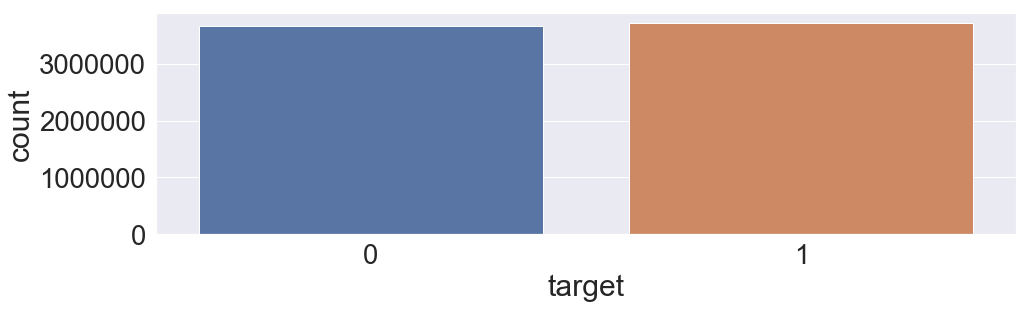

In [34]:
sns.set(font_scale=2.5)
plt.figure(figsize=(15, 5))
ax = sns.countplot('target', data=train, orient='h')
plt.tight_layout()
plt.show()

In [32]:
train.target.value_counts()

1    3714656
0    3662762
Name: target, dtype: int64

## What is the ratio between train and test?

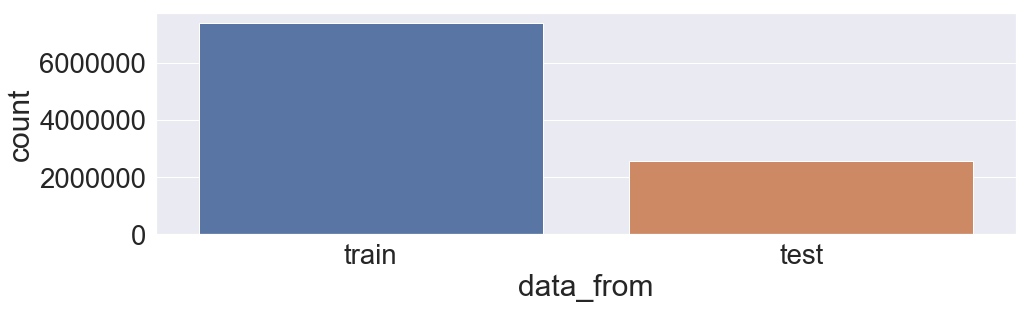

In [41]:
sns.set(font_scale=2.5)
plt.figure(figsize=(15, 5))
ax = sns.countplot('data_from', data=pd.concat([train, test], ignore_index=True, sort=False), orient='h')
plt.tight_layout()
plt.show()